In [1]:
#load package
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

### 1. Data Preparation

#### 1.1. Mengambil data dari google drive dan menampilkan data

In [2]:
df_menu = pd.read_csv('menu.csv')
df_menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [3]:
df_menu['Category'].value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

#### 1.2. Men-Treatment Nilai NaN

In [4]:
# Check Nilai NaN didalam data
check_null_data = df_menu.isnull() 
i=0
for column in df_menu.columns.values.tolist(): 
    if (df_menu[column].isnull().values.any() == True):
        print(column)
        print(check_null_data[column].value_counts()) #menjumlah jumlah nilai unique di dataset
        print("")
        i=1

if (i==0):
    print('Tidak ada nilai NaN dalam dataframe')

Tidak ada nilai NaN dalam dataframe


#### 1.3. Mengecheck Type dari dataframe

In [5]:
df_menu.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

#### 1.3. Deskripsi Nilai Statistik data

In [6]:
df_menu.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


## 2. Analyzing

### Kalori dalam setiap kaetogi menu

In [7]:
#merata ratakan nilai kalori berdasarkan kategori
mean_category = df_menu.groupby('Category').mean()
mean_category_calories1 = mean_category['Calories']
mean_category_calories2 = mean_category['Calories from Fat']

In [8]:
#menampilkan nilai rata rata kalori
mean_category_calories1 = mean_category['Calories']
mean_category_calories1

Category
Beef & Pork           494.000000
Beverages             113.703704
Breakfast             526.666667
Chicken & Fish        552.962963
Coffee & Tea          283.894737
Desserts              222.142857
Salads                270.000000
Smoothies & Shakes    531.428571
Snacks & Sides        245.769231
Name: Calories, dtype: float64

In [9]:
#menampilkan nilai rata rata kalori dari lemak
mean_category_calories2 = mean_category['Calories from Fat']
mean_category_calories2

Category
Beef & Pork           224.666667
Beverages               0.740741
Breakfast             248.928571
Chicken & Fish        242.222222
Coffee & Tea           71.105263
Desserts               64.285714
Salads                108.333333
Smoothies & Shakes    127.678571
Snacks & Sides         94.615385
Name: Calories from Fat, dtype: float64

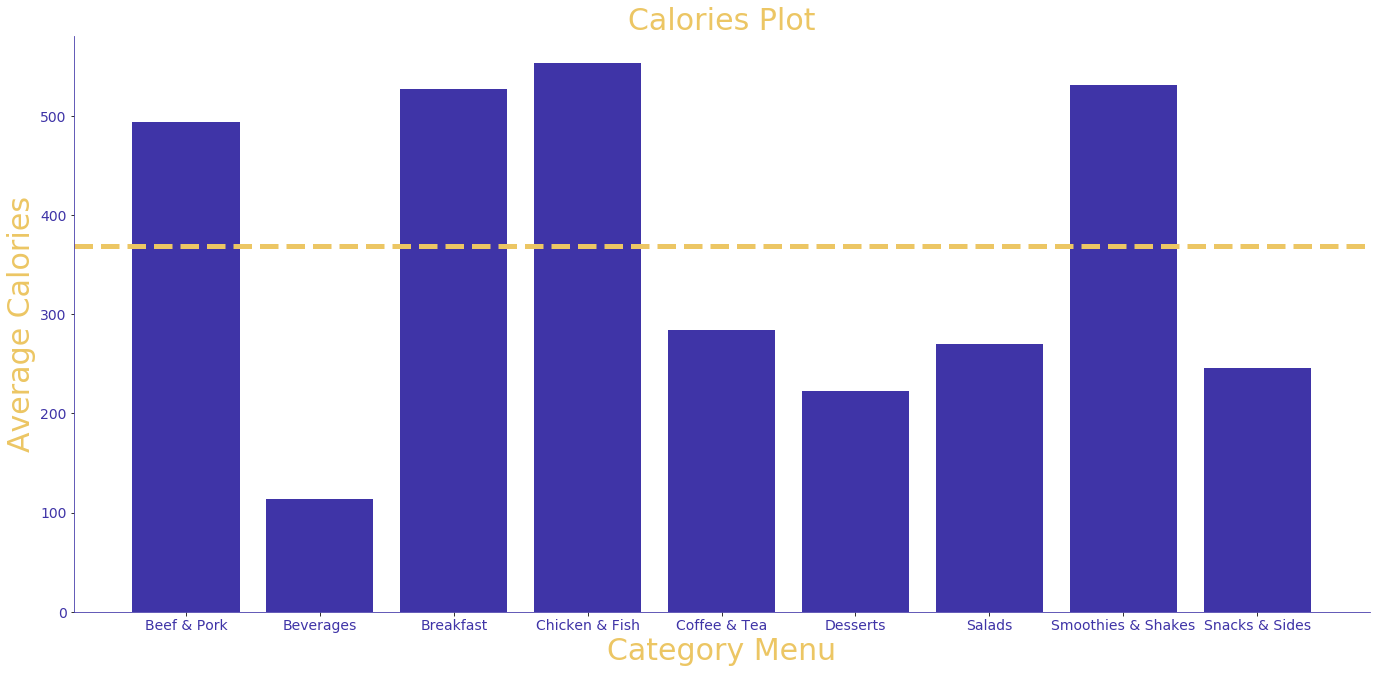

In [10]:
# menampilkan plot histogram dari kalori menu mcd
fig1 = plt.figure()
ax = fig1.add_axes([0, 0, 3, 2])

mean_calories=df_menu['Calories'].mean()

rects1 = ax.bar(mean_category_calories1.index,mean_category_calories1, color='#3f34a7')
ax.axhline(mean_calories, color='#ecc664', linestyle='--', linewidth=5)
ax.set_xlabel('Category Menu', fontsize = 30, color='#ecc664',y=1)
ax.set_ylabel('Average Calories', fontsize = 30, color='#ecc664')
ax.set_title('Calories Plot', fontsize = 30, color='#ecc664')
plt.xticks(fontsize = 14, color='#3f34a7')
plt.yticks(fontsize = 14, color='#3f34a7')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('#3f34a7')
ax.spines['bottom'].set_color('#3f34a7')

fig1.savefig('hasil/Kalori1.png', transparent=True, bbox_inches='tight')

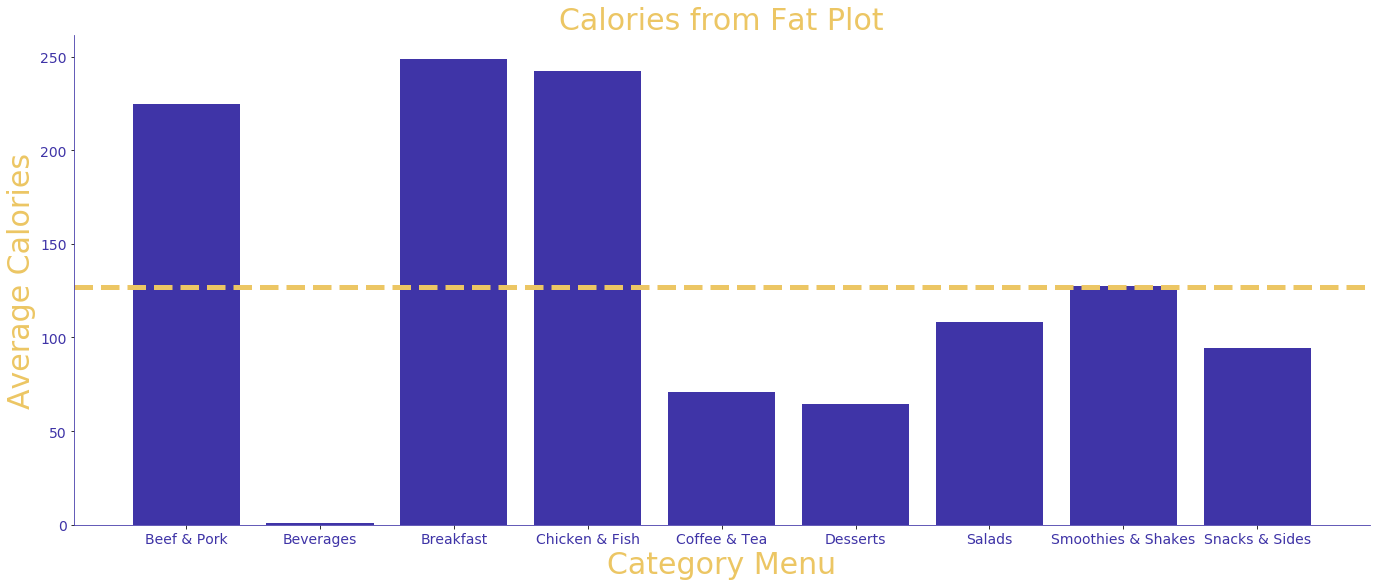

In [12]:
# menampilkan plot histogram dari kalori menu mcd
fig1 = plt.figure()
ax = fig1.add_axes([0, 0, 3, 1.7])

mean_calories=df_menu['Calories from Fat'].mean()

ax.bar(mean_category_calories2.index,mean_category_calories2, color='#3f34a7')
ax.axhline(mean_calories, color='#ecc664', linestyle='--', linewidth=5)
ax.set_xlabel('Category Menu', fontsize = 30, color='#ecc664')
ax.set_ylabel('Average Calories', fontsize = 30, color='#ecc664')
ax.set_title('Calories from Fat Plot', fontsize = 30, color='#ecc664')
plt.xticks(fontsize = 14 ,color='#3f34a7')
plt.yticks(fontsize = 14, color='#3f34a7')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('#3f34a7')
ax.spines['bottom'].set_color('#3f34a7')

fig1.savefig('hasil/Kalori2.png', transparent=True, bbox_inches='tight')

### Kontribusi minuman terhadap total kalori harian

In [13]:
#Mengambil data dengan category yang termasuk ke dalam minuman
df_beverages = df_menu[df_menu['Category'] == 'Beverages']
df_coffe_tea = df_menu[df_menu['Category'] == 'Coffee & Tea']
df_Smoothies_Shakes = df_menu[df_menu['Category'] == 'Smoothies & Shakes']

#### Memisahkan masing masing kategori dalam Beverages

In [14]:
#Menampilkan Item di kategori beverages
df_beverages['Item']

110            Coca-Cola Classic (Small)
111           Coca-Cola Classic (Medium)
112            Coca-Cola Classic (Large)
113            Coca-Cola Classic (Child)
114                    Diet Coke (Small)
115                   Diet Coke (Medium)
116                    Diet Coke (Large)
117                    Diet Coke (Child)
118                    Dr Pepper (Small)
119                   Dr Pepper (Medium)
120                    Dr Pepper (Large)
121                    Dr Pepper (Child)
122               Diet Dr Pepper (Small)
123              Diet Dr Pepper (Medium)
124               Diet Dr Pepper (Large)
125               Diet Dr Pepper (Child)
126                       Sprite (Small)
127                      Sprite (Medium)
128                       Sprite (Large)
129                       Sprite (Child)
130                  1% Low Fat Milk Jug
131          Fat Free Chocolate Milk Jug
132     Minute Maid 100% Apple Juice Box
133     Minute Maid Orange Juice (Small)
134    Minute Ma

In [15]:
#mengambil soda diet
df_soda_diet = df_beverages[(df_beverages['Calories']==0) & (df_beverages['Item'].str.contains('Water') == False)]
df_soda_diet['Item']

114          Diet Coke (Small)
115         Diet Coke (Medium)
116          Diet Coke (Large)
117          Diet Coke (Child)
122     Diet Dr Pepper (Small)
123    Diet Dr Pepper (Medium)
124     Diet Dr Pepper (Large)
125     Diet Dr Pepper (Child)
Name: Item, dtype: object

In [16]:
#mengambil soda non diet
df_soda_non_diet = df_beverages[(df_beverages['Item'].str.contains('Water') == False) & 
                                (df_beverages['Item'].str.contains('Milk') == False) & 
                                (df_beverages['Item'].str.contains('Juice') == False)]
df_soda_non_diet['Item']

110     Coca-Cola Classic (Small)
111    Coca-Cola Classic (Medium)
112     Coca-Cola Classic (Large)
113     Coca-Cola Classic (Child)
114             Diet Coke (Small)
115            Diet Coke (Medium)
116             Diet Coke (Large)
117             Diet Coke (Child)
118             Dr Pepper (Small)
119            Dr Pepper (Medium)
120             Dr Pepper (Large)
121             Dr Pepper (Child)
122        Diet Dr Pepper (Small)
123       Diet Dr Pepper (Medium)
124        Diet Dr Pepper (Large)
125        Diet Dr Pepper (Child)
126                Sprite (Small)
127               Sprite (Medium)
128                Sprite (Large)
129                Sprite (Child)
Name: Item, dtype: object

In [17]:
#mengambil susu
df_milk = df_beverages[df_beverages['Item'].str.contains('Milk')]
df_milk['Item']

130            1% Low Fat Milk Jug
131    Fat Free Chocolate Milk Jug
Name: Item, dtype: object

In [18]:
#mengambil Juice
df_Juice = df_beverages[df_beverages['Item'].str.contains('Juice')]
df_Juice['Item']

132     Minute Maid 100% Apple Juice Box
133     Minute Maid Orange Juice (Small)
134    Minute Maid Orange Juice (Medium)
135     Minute Maid Orange Juice (Large)
Name: Item, dtype: object

In [19]:
#mengambil air
df_water = df_beverages[df_beverages['Item'].str.contains('Water')]
df_water['Item']

136    Dasani Water Bottle
Name: Item, dtype: object

#### Memishakan kategori Coffe & Tea

In [20]:
#Mengambil Coffe
df_coffe = df_coffe_tea[df_coffe_tea['Item'].str.contains('Tea') ==  False]
df_coffe['Item']

145                                       Coffee (Small)
146                                      Coffee (Medium)
147                                       Coffee (Large)
148                                        Latte (Small)
149                                       Latte (Medium)
150                                        Latte (Large)
151                                Caramel Latte (Small)
152                               Caramel Latte (Medium)
153                                Caramel Latte (Large)
154                               Hazelnut Latte (Small)
155                              Hazelnut Latte (Medium)
156                               Hazelnut Latte (Large)
157                         French Vanilla Latte (Small)
158                        French Vanilla Latte (Medium)
159                         French Vanilla Latte (Large)
160    Latte with Sugar Free French Vanilla Syrup (Sm...
161    Latte with Sugar Free French Vanilla Syrup (Me...
162    Latte with Sugar Free Fr

In [21]:
#Mengambil Tea
df_tea = df_coffe_tea[df_coffe_tea['Item'].str.contains('Tea')]
df_tea['Item']

137      Iced Tea (Small)
138     Iced Tea (Medium)
139      Iced Tea (Large)
140      Iced Tea (Child)
141     Sweet Tea (Small)
142    Sweet Tea (Medium)
143     Sweet Tea (Large)
144     Sweet Tea (Child)
Name: Item, dtype: object

#### Menghitung mean berdasarkan ukuran

In [22]:
index = ['Soda Diet', 'Soda Non Diet', 'Juice', 'Coffe', 'Tea', 'Smoothies & Shakes', 'Milk', 'Water']
df_size = pd.DataFrame(index=index)

In [23]:
# df_soda_diet, df_soda_non_diet, df_Juice, df_coffe, df_coffe, df_tea, df_Smoothies_Shakes, ,milk, water
df_small = [df_soda_diet['Calories'][df_soda_diet['Item'].str.contains('Small')].mean(),
           df_soda_non_diet['Calories'][df_soda_non_diet['Item'].str.contains('Small')].mean(),
           df_Juice['Calories'][df_Juice['Item'].str.contains('Small')].mean(),
           df_coffe['Calories'][df_coffe['Item'].str.contains('Small')].mean(),
           df_tea['Calories'][df_tea['Item'].str.contains('Small')].mean(),
           df_Smoothies_Shakes['Calories'][df_Smoothies_Shakes['Item'].str.contains('Small')].mean(),
           0,0]
df_small = [round(float(i), 2) for i in df_small]
df_size['small']=df_small
df_size

,small
Soda Diet,0.00
Soda Non Diet,84.00
Juice,150.00
Coffe,237.93
Tea,75.00
Smoothies & Shakes,430.00
Milk,0.00
Water,0.00


In [24]:
df_child = [df_soda_diet['Calories'][df_soda_diet['Item'].str.contains('Child')].mean(),
           df_soda_non_diet['Calories'][df_soda_non_diet['Item'].str.contains('Child')].mean(),
           df_Juice['Calories'][df_Juice['Item'].str.contains('Child')].mean(),
           df_coffe['Calories'][df_coffe['Item'].str.contains('Child')].mean(),
           df_tea['Calories'][df_tea['Item'].str.contains('Child')].mean(),
           df_Smoothies_Shakes['Calories'][df_Smoothies_Shakes['Item'].str.contains('Child')].mean(),
           0,0]
df_child = [round(float(i), 2) for i in df_child]
df_size['child']=df_child
df_size['child'] = df_size['child'].replace(np.nan, 0)
df_size

,small,child
Soda Diet,0.00,0.0
Soda Non Diet,84.00,60.0
Juice,150.00,0.0
Coffe,237.93,0.0
Tea,75.00,55.0
Smoothies & Shakes,430.00,0.0
Milk,0.00,0.0
Water,0.00,0.0


In [25]:
df_medium = [df_soda_diet['Calories'][df_soda_diet['Item'].str.contains('Medium')].mean(),
           df_soda_non_diet['Calories'][df_soda_non_diet['Item'].str.contains('Medium')].mean(),
           df_Juice['Calories'][df_Juice['Item'].str.contains('Medium')].mean(),
           df_coffe['Calories'][df_coffe['Item'].str.contains('Medium')].mean(),
           df_tea['Calories'][df_tea['Item'].str.contains('Medium')].mean(),
           df_Smoothies_Shakes['Calories'][df_Smoothies_Shakes['Item'].str.contains('Medium')].mean(),
           df_milk['Calories'].mean(),df_water['Calories'].mean()]
df_medium = [round(float(i), 2) for i in df_medium]
df_size['medium']=df_medium
df_size['medium'] = df_size['medium'].replace(np.nan, 0)
df_size

,small,child,medium
Soda Diet,0.00,0.0,0.00
Soda Non Diet,84.00,60.0,118.00
Juice,150.00,0.0,190.00
Coffe,237.93,0.0,294.83
Tea,75.00,55.0,90.00
Smoothies & Shakes,430.00,0.0,591.00
Milk,0.00,0.0,115.00
Water,0.00,0.0,0.00


In [26]:
df_large = [df_soda_diet['Calories'][df_soda_diet['Item'].str.contains('Large')].mean(),
           df_soda_non_diet['Calories'][df_soda_non_diet['Item'].str.contains('Large')].mean(),
           df_Juice['Calories'][df_Juice['Item'].str.contains('Large')].mean(),
           df_coffe['Calories'][df_coffe['Item'].str.contains('Large')].mean(),
           df_tea['Calories'][df_tea['Item'].str.contains('Large')].mean(),
           df_Smoothies_Shakes['Calories'][df_Smoothies_Shakes['Item'].str.contains('Large')].mean(), 0,0]
df_large = [round(float(i), 2) for i in df_large]
df_size['large']=df_large
df_size['large'] = df_size['large'].replace(np.nan, 0)
df_size

,small,child,medium,large
Soda Diet,0.00,0.0,0.00,0.00
Soda Non Diet,84.00,60.0,118.00,166.00
Juice,150.00,0.0,190.00,280.00
Coffe,237.93,0.0,294.83,374.48
Tea,75.00,55.0,90.00,110.00
Smoothies & Shakes,430.00,0.0,591.00,621.43
Milk,0.00,0.0,115.00,0.00
Water,0.00,0.0,0.00,0.00


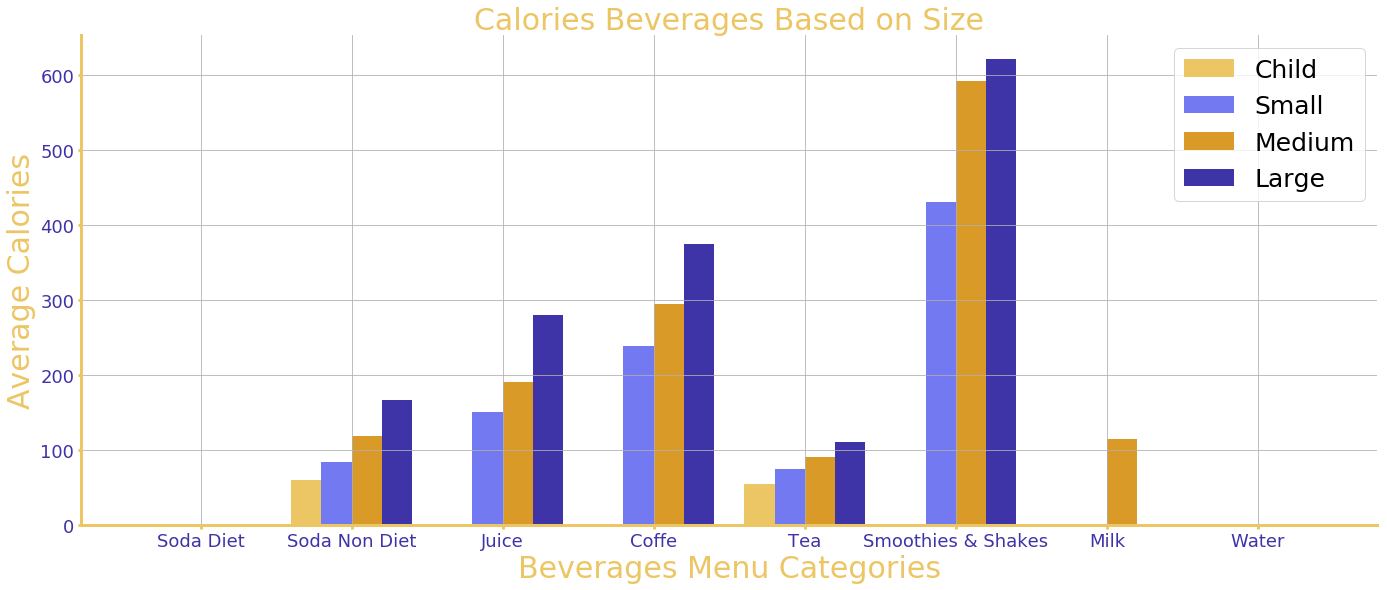

In [28]:
fig1 = plt.figure()
ax = fig1.add_axes([0, 0, 3, 1.7])

labels = index
index2 = [0,'Soda Diet', 'Soda Non Diet', 'Juice', 'Coffe', 'Tea', 'Smoothies & Shakes', 'Milk', 'Water']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

rects4 = ax.bar(x - 3*(width/2), df_size['child'], width, label='Child', color='#ecc664')
rects1 = ax.bar(x - (width/2), df_size['small'], width, label='Small' , color='#7379f0')
rects2 = ax.bar(x + width/2, df_size['medium'], width, label='Medium' , color='#da9a27')
rects3 = ax.bar(x + 3*(width/2), df_size['large'], width, label='Large' , color='#3f34a7')

ax.set_xticklabels(index2, fontsize = 18)
ax.set_xlabel('Beverages Menu Categories', fontsize = 30, color='#ecc664')
ax.set_ylabel('Average Calories', fontsize = 30, color='#ecc664')
ax.set_title('Calories Beverages Based on Size', fontsize = 30, color='#ecc664')
plt.xticks(fontsize = 18,color='#3f34a7')
plt.yticks(fontsize = 18, color='#3f34a7')
ax.legend(prop={'size': 25})
ax.grid(True)

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('#ecc664')
ax.spines['bottom'].set_color('#ecc664')
ax.xaxis.set_tick_params(width=3, color='#ecc664')
ax.yaxis.set_tick_params(width=3, color='#ecc664')
plt.setp(ax.spines.values(), linewidth=3)

fig1.savefig('hasil/Minuman1.png', transparent=True, bbox_inches='tight')

plt.show()

#### Menghitung Kontribusi kalori terhadap Calory Intake

In [29]:
#Average Calory Intake per day
#Women
df_persen_woman = df_size/2000*100
df_persen_woman

,small,child,medium,large
Soda Diet,0.0000,0.00,0.0000,0.0000
Soda Non Diet,4.2000,3.00,5.9000,8.3000
Juice,7.5000,0.00,9.5000,14.0000
Coffe,11.8965,0.00,14.7415,18.7240
Tea,3.7500,2.75,4.5000,5.5000
Smoothies & Shakes,21.5000,0.00,29.5500,31.0715
Milk,0.0000,0.00,5.7500,0.0000
Water,0.0000,0.00,0.0000,0.0000


In [30]:
#Man
df_persen_man = df_size/2600*100
df_persen_man

,small,child,medium,large
Soda Diet,0.000000,0.000000,0.000000,0.000000
Soda Non Diet,3.230769,2.307692,4.538462,6.384615
Juice,5.769231,0.000000,7.307692,10.769231
Coffe,9.151154,0.000000,11.339615,14.403077
Tea,2.884615,2.115385,3.461538,4.230769
Smoothies & Shakes,16.538462,0.000000,22.730769,23.901154
Milk,0.000000,0.000000,4.423077,0.000000
Water,0.000000,0.000000,0.000000,0.000000


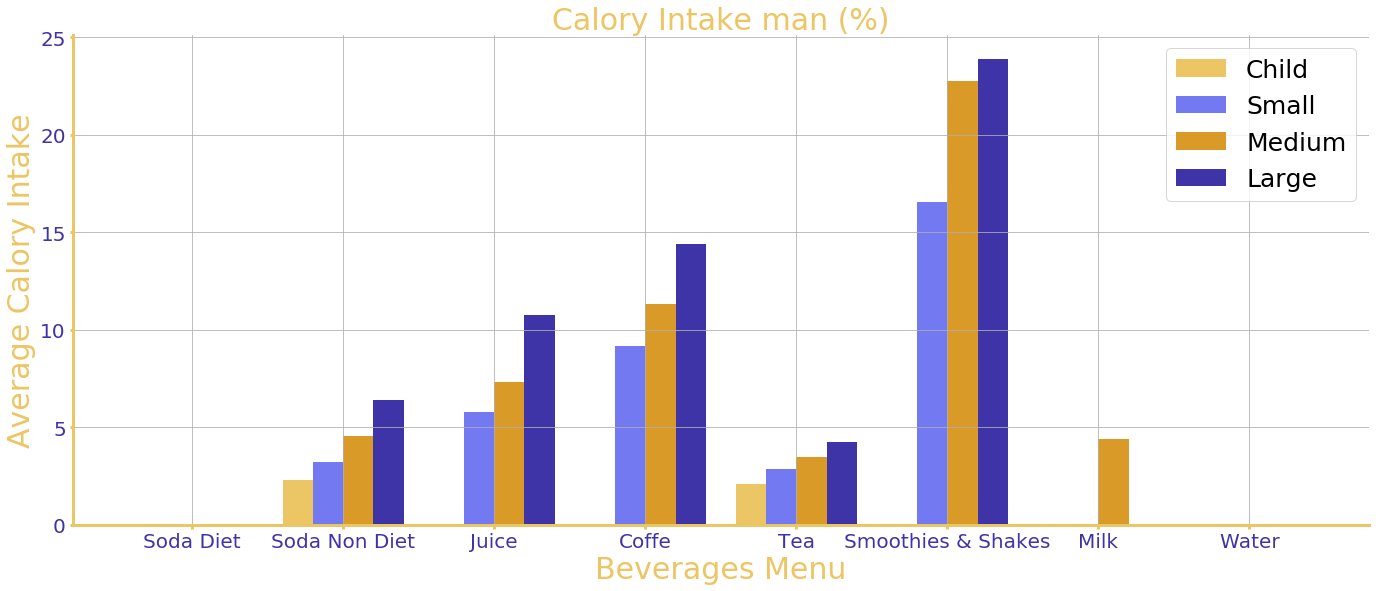

In [32]:
fig1 = plt.figure()
ax = fig1.add_axes([0, 0, 3, 1.7])

labels = index
index2 = [0,'Soda Diet', 'Soda Non Diet', 'Juice', 'Coffe', 'Tea', 'Smoothies & Shakes', 'Milk', 'Water']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

rects4 = ax.bar(x - 3*(width/2), df_persen_man['child'], width, label='Child', color='#ecc664')
rects1 = ax.bar(x - (width/2), df_persen_man['small'], width, label='Small' , color='#7379f0')
rects2 = ax.bar(x + width/2, df_persen_man['medium'], width, label='Medium' , color='#da9a27')
rects3 = ax.bar(x + 3*(width/2), df_persen_man['large'], width, label='Large' , color='#3f34a7')

ax.set_xticklabels(index2, fontsize = 18)
ax.set_xlabel('Beverages Menu', fontsize = 30, color='#ecc664')
ax.set_ylabel('Average Calory Intake', fontsize = 30, color='#ecc664')
ax.set_title('Calory Intake man (%)', fontsize = 30, color='#ecc664')
plt.xticks(fontsize = 20, color='#3f34a7')
plt.yticks(fontsize = 20, color='#3f34a7')
ax.legend(prop={'size': 25})
ax.grid(True)

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('#ecc664')
ax.spines['bottom'].set_color('#ecc664')
ax.xaxis.set_tick_params(width=3, color='#ecc664')
ax.yaxis.set_tick_params(width=3, color='#ecc664')
plt.setp(ax.spines.values(), linewidth=3)

fig1.savefig('hasil/Minuman2.png', transparent=True, bbox_inches='tight')

plt.show()

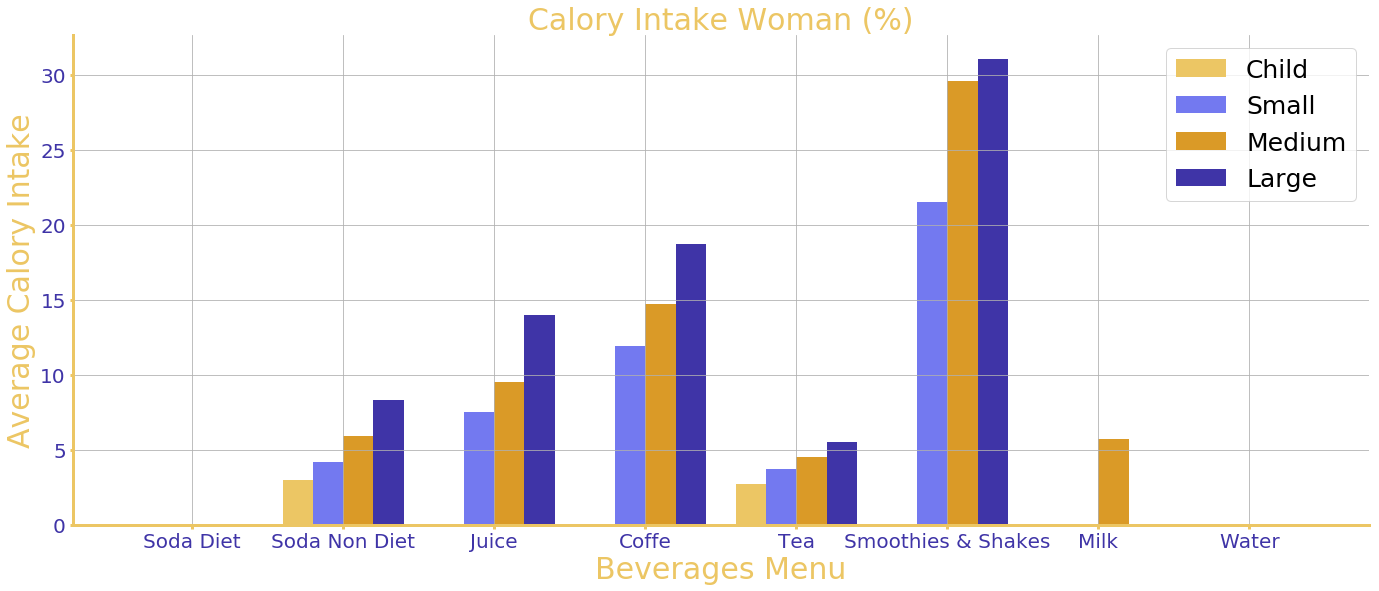

In [35]:
fig1 = plt.figure()
ax = fig1.add_axes([0, 0, 3, 1.7])

labels = index
index2 = [0,'Soda Diet', 'Soda Non Diet', 'Juice', 'Coffe', 'Tea', 'Smoothies & Shakes', 'Milk', 'Water']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

rects4 = ax.bar(x - 3*(width/2), df_persen_woman['child'], width, label='Child', color='#ecc664')
rects1 = ax.bar(x - (width/2), df_persen_woman['small'], width, label='Small' , color='#7379f0')
rects2 = ax.bar(x + width/2, df_persen_woman['medium'], width, label='Medium' , color='#da9a27')
rects3 = ax.bar(x + 3*(width/2), df_persen_woman['large'], width, label='Large' , color='#3f34a7')

ax.set_xticklabels(index2, fontsize = 18)
ax.set_xlabel('Beverages Menu', fontsize = 30, color='#ecc664')
ax.set_ylabel('Average Calory Intake', fontsize = 30, color='#ecc664')
ax.set_title('Calory Intake Woman (%)', fontsize = 30, color='#ecc664')
plt.xticks(fontsize = 20, color='#3f34a7')
plt.yticks(fontsize = 20, color='#3f34a7')
ax.legend(prop={'size': 25})
ax.grid(True)

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('#ecc664')
ax.spines['bottom'].set_color('#ecc664')
ax.xaxis.set_tick_params(width=3, color='#ecc664')
ax.yaxis.set_tick_params(width=3, color='#ecc664')
plt.setp(ax.spines.values(), linewidth=3)

fig1.savefig('hasil/Minuman3.png', transparent=True, bbox_inches='tight')

plt.show()

### Perbandingan nilai gizi antara menu dengan Crispy Chicken dan Grilled Chicken

In [36]:
df_menu['Nutritional Value'] = df_menu[['Total Fat','Carbohydrates', 'Protein']].sum(axis=1)
df_menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Nutritional Value
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,10,4,17,3,17,10,0,25,15,61.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,10,4,17,3,18,6,0,25,8,56.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,10,4,17,2,14,8,0,25,10,66.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,10,4,17,2,21,15,0,30,15,79.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,10,4,17,2,21,6,0,25,10,74.0


In [37]:
index_s = ['Crispy','Grilled']
df_sandwich = pd.DataFrame(index=index_s)

In [38]:
#mengambil crispy
df_crispy = df_menu[df_menu['Item'].str.contains('Crispy') & df_menu['Item'].str.contains('Sandwich')]
print (df_crispy.shape)
print (df_crispy['Item'])

(5, 25)
57      Premium Crispy Chicken Classic Sandwich
59         Premium Crispy Chicken Club Sandwich
61    Premium Crispy Chicken Ranch BLT Sandwich
63      Bacon Clubhouse Crispy Chicken Sandwich
65       Southern Style Crispy Chicken Sandwich
Name: Item, dtype: object


In [39]:
#mengambil Grilled
df_grilled = df_menu[df_menu['Item'].str.contains('Grilled') & df_menu['Item'].str.contains('Sandwich')]
print (df_grilled.shape)
print (df_grilled['Item'])

(4, 25)
58      Premium Grilled Chicken Classic Sandwich
60         Premium Grilled Chicken Club Sandwich
62    Premium Grilled Chicken Ranch BLT Sandwich
64      Bacon Clubhouse Grilled Chicken Sandwich
Name: Item, dtype: object


In [40]:
crispy = df_crispy['Nutritional Value'][df_crispy['Item'].str.contains('Southern') == False].mean()
grilled = df_grilled['Nutritional Value'].mean()


In [41]:
df_sandwich['nilai']=crispy,grilled
df_sandwich

,nilai
Crispy,121.00
Grilled,98.25


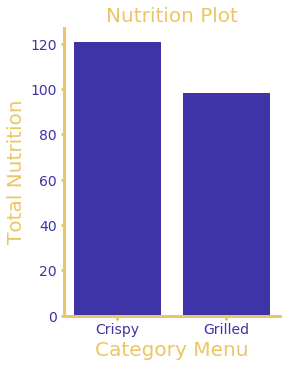

In [43]:
# menampilkan plot histogram dari kalori menu mcd
fig1 = plt.figure()
ax = fig1.add_axes([0, 0, 0.5, 1])

ax.bar(df_sandwich.index,df_sandwich['nilai'], color='#3f34a7')
ax.set_xlabel('Category Menu', fontsize = 20, color='#ecc664',y=1)
ax.set_ylabel('Total Nutrition', fontsize = 20, color='#ecc664')
ax.set_title('Nutrition Plot', fontsize = 20, color='#ecc664')
plt.xticks(fontsize = 14, color='#3f34a7')
plt.yticks(fontsize = 14, color='#3f34a7')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('#ecc664')
ax.spines['bottom'].set_color('#ecc664')
ax.xaxis.set_tick_params(width=3, color='#ecc664')
ax.yaxis.set_tick_params(width=3, color='#ecc664')
plt.setp(ax.spines.values(), linewidth=3)

fig1.savefig('b.png', transparent=True, bbox_inches='tight')


fig1.savefig('hasil/Nutrisi1.png', transparent=True, bbox_inches='tight')

### Perbandingan nilai gizi antara menu dengan Telur utuh dan Telur Putih

In [44]:
egg = df_menu[df_menu['Item'].str.contains('Egg')]
egg

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Nutritional Value
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,10,4,17,3,17,10,0,25,15,61.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,10,4,17,3,18,6,0,25,8,56.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,10,4,17,2,21,15,0,30,15,79.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,10,4,17,2,21,6,0,25,10,74.0
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,210,23.0,36,9.0,46,1.0,...,10,4,18,3,26,15,2,30,20,80.0
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,0.0,...,13,2,7,3,19,10,8,15,15,83.0
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,...,14,3,12,4,19,15,8,20,20,92.0
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,180,20.0,32,11.0,56,0.0,...,12,2,7,3,20,2,8,15,10,76.0
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,38,12.0,59,0.0,...,14,3,12,4,20,6,8,15,15,87.0
12,Breakfast,Sausage Biscuit with Egg (Regular Biscuit),5.7 oz (163 g),510,290,33.0,50,14.0,71,0.0,...,12,2,6,2,18,6,0,10,20,87.0


In [45]:
df_Egg = df_menu[(df_menu['Item'].str.contains('Egg'))& (df_menu['Item'].str.contains('White') == False)]
print(df_Egg.shape)
df_Egg['Item']

(12, 25)


0                                      Egg McMuffin
3                         Sausage McMuffin with Egg
5                              Steak & Egg McMuffin
6     Bacon, Egg & Cheese Biscuit (Regular Biscuit)
7       Bacon, Egg & Cheese Biscuit (Large Biscuit)
12       Sausage Biscuit with Egg (Regular Biscuit)
13         Sausage Biscuit with Egg (Large Biscuit)
18            Steak & Egg Biscuit (Regular Biscuit)
19                   Bacon, Egg & Cheese McGriddles
22                 Sausage, Egg & Cheese McGriddles
24                        Bacon, Egg & Cheese Bagel
26                        Steak, Egg & Cheese Bagel
Name: Item, dtype: object

In [46]:
df_White = df_menu[(df_menu['Item'].str.contains('Egg'))& (df_menu['Item'].str.contains('White'))]
print(df_White.shape)
df_White['Item']

(13, 25)


1                                     Egg White Delight
4                      Sausage McMuffin with Egg Whites
8     Bacon, Egg & Cheese Biscuit with Egg Whites (R...
9     Bacon, Egg & Cheese Biscuit with Egg Whites (L...
14    Sausage Biscuit with Egg Whites (Regular Biscuit)
15      Sausage Biscuit with Egg Whites (Large Biscuit)
20       Bacon, Egg & Cheese McGriddles with Egg Whites
23     Sausage, Egg & Cheese McGriddles with Egg Whites
25            Bacon, Egg & Cheese Bagel with Egg Whites
29      Big Breakfast with Egg Whites (Regular Biscuit)
30        Big Breakfast with Egg Whites (Large Biscuit)
33    Big Breakfast with Hotcakes and Egg Whites (Re...
34    Big Breakfast with Hotcakes and Egg Whites (La...
Name: Item, dtype: object

In [47]:
white = df_White['Nutritional Value'][(df_White['Item'].str.contains('Sausage')) | 
                                      (df_White['Item'].str.contains('Bacon'))].mean()
egg = df_Egg['Nutritional Value'][(df_Egg['Item'].str.contains('Sausage')) | 
                                  (df_Egg['Item'].str.contains('Bacon'))].mean()
white

86.375

In [48]:
index_s = ['White','Whole Egg']
df_egg = pd.DataFrame(index=index_s)

In [49]:
df_egg['nilai']=white,egg
df_egg

,nilai
White,86.375
Whole Egg,92.875


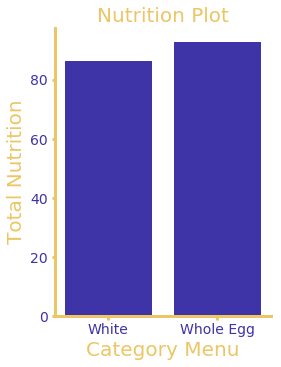

In [51]:
# menampilkan plot histogram dari kalori menu mcd
fig1 = plt.figure()
ax = fig1.add_axes([0, 0, 0.5, 1])

ax.bar(df_egg.index,df_egg['nilai'], color='#3f34a7')
ax.set_xlabel('Category Menu', fontsize = 20, color='#ecc664',y=1)
ax.set_ylabel('Total Nutrition', fontsize = 20, color='#ecc664')
ax.set_title('Nutrition Plot', fontsize = 20, color='#ecc664')
plt.xticks(fontsize = 14, color='#3f34a7')
plt.yticks(fontsize = 14, color='#3f34a7')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('#ecc664')
ax.spines['bottom'].set_color('#ecc664')
ax.xaxis.set_tick_params(width=3, color='#ecc664')
ax.yaxis.set_tick_params(width=3, color='#ecc664')
plt.setp(ax.spines.values(), linewidth=3)

fig1.savefig('b.png', transparent=True, bbox_inches='tight')


fig1.savefig('hasil/Nutrisi2.png', transparent=True, bbox_inches='tight')

### Menu yang bisa dibeli untuk memenuhi kalori harian

In [52]:
df_menu2=df_menu[['Item', 'Calories']]

In [53]:
df_calories = df_menu2['Calories']
df_calories.size

260

In [54]:
#Woman

for k in range (0,df_calories.size):
    for i in range (0,df_calories.size):
        total_cal = int(df_calories[k]) + int(df_calories[i]) 
        index=[k,i]

        if (total_cal>=2000):
            break
        else :
            j=0

In [55]:
total_cal

2290

In [56]:
df_menu2.iloc[index,:]

,Item,Calories
259,McFlurry with Reese's Peanut Butter Cups (Snack),410
82,Chicken McNuggets (40 piece),1880
